In [0]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
### build the dataset
# This is a nonlinear AND long-distance dataset
# (Actually, we will test long-distance vs. short-distance patterns)

# Start with a small T and increase it later.
T = 10
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, -1, -2, -3) # short distance
# y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [4]:
# Try a linear model first - note: it is classification now!
i= Input(shape=(T, ))
x = Dense(1, activation='sigmoid')(i)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy']
)

# train the network
r = model.fit(
    X, Y,
    epochs=100,
    validation_split=0.5,
)

Epoch 1/100
79/79 [==============================] - 0s 4ms/step - loss: 0.7376 - accuracy: 0.5016 - val_loss: 0.6935 - val_accuracy: 0.5040
Epoch 2/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.4836 - val_loss: 0.6941 - val_accuracy: 0.5072
Epoch 3/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.4988 - val_loss: 0.6938 - val_accuracy: 0.5032
Epoch 4/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.5084 - val_loss: 0.6930 - val_accuracy: 0.5068
Epoch 5/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.5084 - val_loss: 0.6934 - val_accuracy: 0.5052
Epoch 6/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.4924 - val_loss: 0.6937 - val_accuracy: 0.5124
Epoch 7/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.4904 - val_loss: 0.6941 - val_accuracy: 0.5128
Epoch 8/100
7

79/79 [==============================] - 0s 4ms/step - loss: 0.0994 - accuracy: 0.9728 - val_loss: 0.1490 - val_accuracy: 0.9584

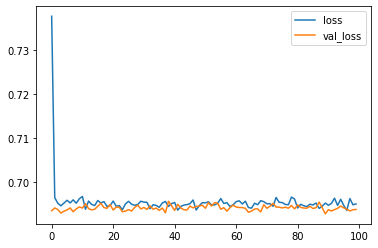

In [5]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

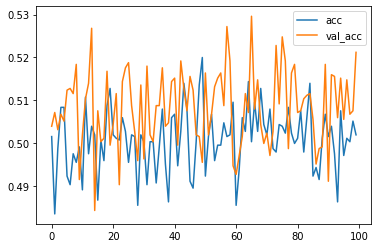

In [6]:
# Plot the accuracy too - should be around 50%
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [0]:
### Now try simple RNN
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)
# x = LSTM(5)(i)
# x = GRU(5)(i)

# method 2
# x = LSTM(5, return_sequences=True)(i)
# x = GlobalMaxPool1D()(x)
x = Dense(1, activation="sigmoid")(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    # optimizer='rmsprop',
    # optimizer='adam',
    optimizer=Adam(lr=0.01),
    # optimizer=SGD(lr=0.1, momentum=0.9),
    metrics=['accuracy']
)

In [8]:
# train the RNN
r = model.fit(
    inputs, Y, 
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 0s 6ms/step - loss: 0.7037 - accuracy: 0.5476 - val_loss: 0.6603 - val_accuracy: 0.6588
Epoch 2/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6440 - accuracy: 0.6664 - val_loss: 0.6079 - val_accuracy: 0.7244
Epoch 3/200
79/79 [==============================] - 0s 4ms/step - loss: 0.5661 - accuracy: 0.7608 - val_loss: 0.5034 - val_accuracy: 0.8184
Epoch 4/200
79/79 [==============================] - 0s 4ms/step - loss: 0.4470 - accuracy: 0.8512 - val_loss: 0.3726 - val_accuracy: 0.8788
Epoch 5/200
79/79 [==============================] - 0s 4ms/step - loss: 0.3406 - accuracy: 0.8904 - val_loss: 0.2897 - val_accuracy: 0.9172
Epoch 6/200
79/79 [==============================] - 0s 4ms/step - loss: 0.2733 - accuracy: 0.9216 - val_loss: 0.2447 - val_accuracy: 0.9260
Epoch 7/200
79/79 [==============================] - 0s 4ms/step - loss: 0.2343 - accuracy: 0.9356 - val_loss: 0.2106 - val_accuracy: 0.9408
Epoch 8/200
7

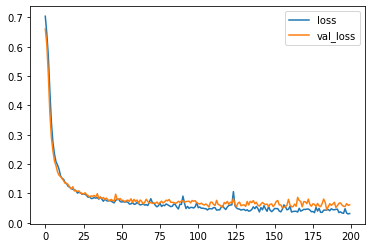

In [9]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

79/79 [==============================] - 0s 4ms/step - loss: 0.0994 - accuracy: 0.9728 - val_loss: 0.1490 - val_accuracy: 0.9584

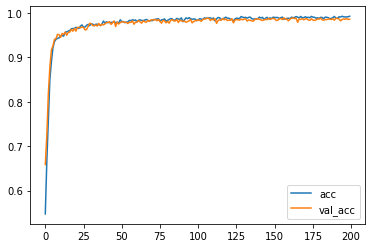

In [10]:
# plot some data
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [0]:
# Now change to the long distance problem
# Start with a small T and increase it later.
T = 10
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [12]:
# Now test our Simple RNN again
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)

x = Dense(1, activation="sigmoid")(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy']
)

# train the RNN
r = model.fit(
    inputs, Y, 
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 0s 6ms/step - loss: 0.7172 - accuracy: 0.4988 - val_loss: 0.6955 - val_accuracy: 0.4992
Epoch 2/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6909 - accuracy: 0.5352 - val_loss: 0.6881 - val_accuracy: 0.5520
Epoch 3/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6887 - accuracy: 0.5556 - val_loss: 0.6893 - val_accuracy: 0.5460
Epoch 4/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6900 - accuracy: 0.5580 - val_loss: 0.6888 - val_accuracy: 0.5468
Epoch 5/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6924 - accuracy: 0.5264 - val_loss: 0.6963 - val_accuracy: 0.4820
Epoch 6/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6938 - accuracy: 0.5020 - val_loss: 0.6903 - val_accuracy: 0.5360
Epoch 7/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6883 - accuracy: 0.5520 - val_loss: 0.6918 - val_accuracy: 0.5376
Epoch 8/200
7

79/79 [==============================] - 0s 4ms/step - loss: 0.0994 - accuracy: 0.9728 - val_loss: 0.1490 - val_accuracy: 0.9584

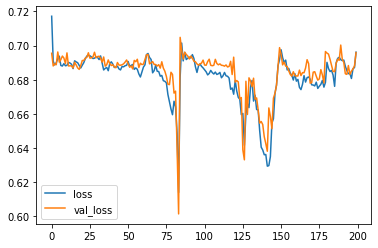

In [13]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

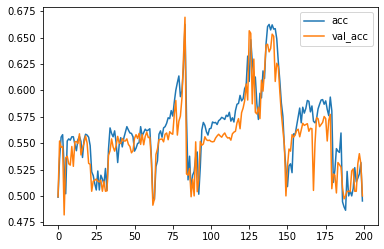

In [14]:
# plot some data
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [15]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation="sigmoid")(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy']
)

# train the RNN
r = model.fit(
    inputs, Y, 
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6954 - accuracy: 0.4940 - val_loss: 0.6941 - val_accuracy: 0.5080
Epoch 2/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6936 - accuracy: 0.5116 - val_loss: 0.6944 - val_accuracy: 0.4992
Epoch 3/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6946 - accuracy: 0.4944 - val_loss: 0.6948 - val_accuracy: 0.5048
Epoch 4/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6928 - accuracy: 0.5072 - val_loss: 0.6950 - val_accuracy: 0.4980
Epoch 5/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6934 - accuracy: 0.5040 - val_loss: 0.6943 - val_accuracy: 0.5028
Epoch 6/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6932 - accuracy: 0.5044 - val_loss: 0.6945 - val_accuracy: 0.4856
Epoch 7/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6924 - accuracy: 0.5180 - val_loss: 0.6954 - val_accuracy: 0.5080
Epoch 8/200


79/79 [==============================] - 0s 6ms/step - loss: 0.0194 - accuracy: 0.9944 - val_loss: 0.0323 - val_accuracy: 0.9916

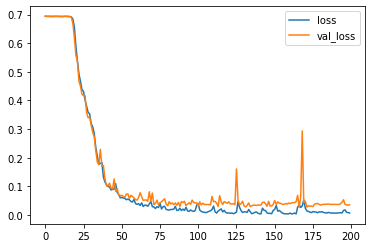

In [0]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

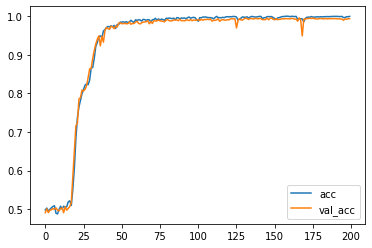

In [0]:
# plot some data
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [0]:
# Make the problem harder by making T larger
T = 20
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [0]:
# Now test our Simple RNN again
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)

x = Dense(1, activation="sigmoid")(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy']
)

# train the RNN
r = model.fit(
    inputs, Y, 
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 1s 7ms/step - loss: 0.7094 - accuracy: 0.5020 - val_loss: 0.6961 - val_accuracy: 0.4976
Epoch 2/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6934 - accuracy: 0.5104 - val_loss: 0.6937 - val_accuracy: 0.4936
Epoch 3/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6920 - accuracy: 0.5172 - val_loss: 0.6949 - val_accuracy: 0.4972
Epoch 4/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6934 - accuracy: 0.5064 - val_loss: 0.6957 - val_accuracy: 0.5036
Epoch 5/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6917 - accuracy: 0.5240 - val_loss: 0.6944 - val_accuracy: 0.4976
Epoch 6/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6907 - accuracy: 0.5224 - val_loss: 0.6962 - val_accuracy: 0.5020
Epoch 7/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5176 - val_loss: 0.6957 - val_accuracy: 0.4872
Epoch 8/200
7

79/79 [==============================] - 0s 5ms/step - loss: 0.6911 - accuracy: 0.5272 - val_loss: 0.6909 - val_accuracy: 0.5396

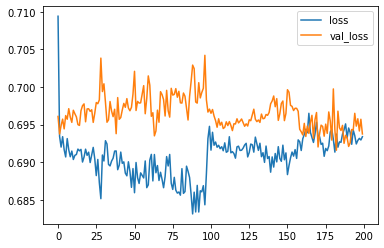

In [0]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

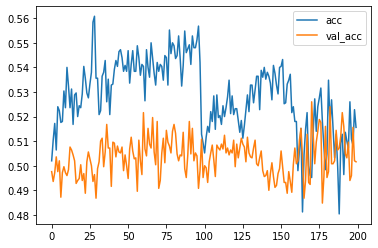

In [0]:
# plot some data
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [0]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation="sigmoid")(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy']
)

# train the RNN
r = model.fit(
    inputs, Y, 
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 1s 13ms/step - loss: 0.6937 - accuracy: 0.5108 - val_loss: 0.6933 - val_accuracy: 0.5092
Epoch 2/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6938 - accuracy: 0.4968 - val_loss: 0.6951 - val_accuracy: 0.5016
Epoch 3/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6936 - accuracy: 0.5048 - val_loss: 0.6934 - val_accuracy: 0.5076
Epoch 4/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6928 - accuracy: 0.5196 - val_loss: 0.6935 - val_accuracy: 0.4976
Epoch 5/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6926 - accuracy: 0.5112 - val_loss: 0.6931 - val_accuracy: 0.5048
Epoch 6/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6929 - accuracy: 0.5156 - val_loss: 0.6938 - val_accuracy: 0.5024
Epoch 7/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6930 - accuracy: 0.5036 - val_loss: 0.6930 - val_accuracy: 0.5148
Epoch 8/20

79/79 [==============================] - 1s 9ms/step - loss: 0.4281 - accuracy: 0.8144 - val_loss: 0.4594 - val_accuracy: 0.8024

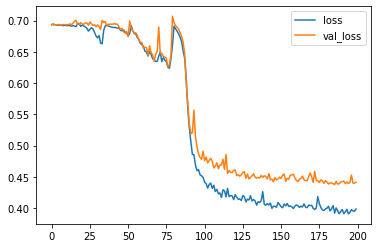

In [0]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

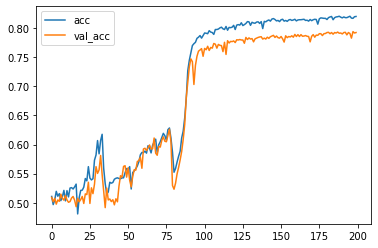

In [0]:
# plot some data
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [0]:
# Now test our GRU
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = GRU(5)(i)

x = Dense(1, activation="sigmoid")(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy']
)

# train the RNN
r = model.fit(
    inputs, Y, 
    epochs=400,
    validation_split=0.5,
)

Epoch 1/400
79/79 [==============================] - 1s 14ms/step - loss: 0.6958 - accuracy: 0.4972 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 2/400
79/79 [==============================] - 1s 10ms/step - loss: 0.6951 - accuracy: 0.4960 - val_loss: 0.6937 - val_accuracy: 0.5032
Epoch 3/400
79/79 [==============================] - 1s 10ms/step - loss: 0.6928 - accuracy: 0.5180 - val_loss: 0.6935 - val_accuracy: 0.5156
Epoch 4/400
79/79 [==============================] - 1s 10ms/step - loss: 0.6926 - accuracy: 0.5024 - val_loss: 0.6938 - val_accuracy: 0.5060
Epoch 5/400
79/79 [==============================] - 1s 10ms/step - loss: 0.6936 - accuracy: 0.4976 - val_loss: 0.6931 - val_accuracy: 0.5044
Epoch 6/400
79/79 [==============================] - 1s 10ms/step - loss: 0.6926 - accuracy: 0.5104 - val_loss: 0.6941 - val_accuracy: 0.5060
Epoch 7/400
79/79 [==============================] - 1s 10ms/step - loss: 0.6910 - accuracy: 0.5092 - val_loss: 0.6942 - val_accuracy: 0.5072
Epoch 

79/79 [==============================] - 1s 9ms/step - loss: 0.6402 - accuracy: 0.6328 - val_loss: 0.7593 - val_accuracy: 0.4972

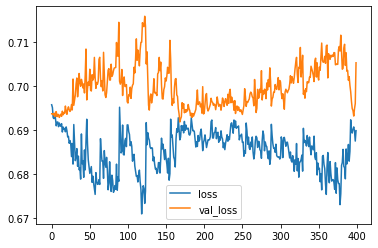

In [0]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

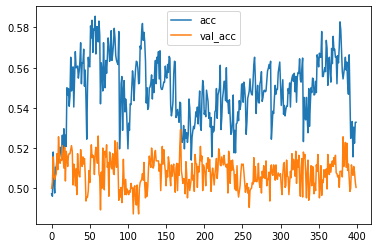

In [0]:
# plot some data
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [0]:
# Make the problem harder by making T larger
T = 30
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [0]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation="sigmoid")(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy']
)

# train the RNN
r = model.fit(
    inputs, Y, 
    epochs=400,
    validation_split=0.5,
)

Epoch 1/400
79/79 [==============================] - 1s 16ms/step - loss: 0.6937 - accuracy: 0.5212 - val_loss: 0.6964 - val_accuracy: 0.4912
Epoch 2/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6920 - accuracy: 0.5204 - val_loss: 0.6976 - val_accuracy: 0.4868
Epoch 3/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6920 - accuracy: 0.5184 - val_loss: 0.6972 - val_accuracy: 0.4904
Epoch 4/400
79/79 [==============================] - 1s 13ms/step - loss: 0.6909 - accuracy: 0.5308 - val_loss: 0.6974 - val_accuracy: 0.4924
Epoch 5/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6892 - accuracy: 0.5424 - val_loss: 0.6958 - val_accuracy: 0.5060
Epoch 6/400
79/79 [==============================] - 1s 14ms/step - loss: 0.6913 - accuracy: 0.5408 - val_loss: 0.6970 - val_accuracy: 0.4944
Epoch 7/400
79/79 [==============================] - 1s 14ms/step - loss: 0.6887 - accuracy: 0.5480 - val_loss: 0.7006 - val_accuracy: 0.4884
Epoch 

79/79 [==============================] - 1s 10ms/step - loss: 0.6666 - accuracy: 0.5628 - val_loss: 0.7229 - val_accuracy: 0.4996

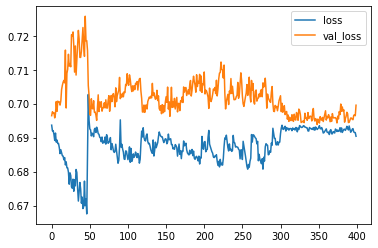

In [0]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

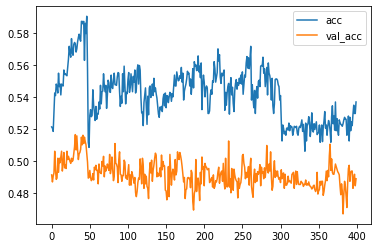

In [0]:
# plot some data
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [0]:
# Now test our LSTM with Global Max Pooling
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)

x = Dense(1, activation="sigmoid")(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy']
)

# train the RNN
r = model.fit(
    inputs, Y, 
    epochs=100,
    validation_split=0.5,
)

Epoch 1/100
79/79 [==============================] - 1s 17ms/step - loss: 0.6938 - accuracy: 0.5200 - val_loss: 0.6984 - val_accuracy: 0.4852
Epoch 2/100
79/79 [==============================] - 1s 14ms/step - loss: 0.6921 - accuracy: 0.5276 - val_loss: 0.6965 - val_accuracy: 0.4860
Epoch 3/100
79/79 [==============================] - 1s 13ms/step - loss: 0.6919 - accuracy: 0.5176 - val_loss: 0.6955 - val_accuracy: 0.4856
Epoch 4/100
79/79 [==============================] - 1s 12ms/step - loss: 0.6901 - accuracy: 0.5268 - val_loss: 0.6917 - val_accuracy: 0.5072
Epoch 5/100
79/79 [==============================] - 1s 13ms/step - loss: 0.6807 - accuracy: 0.5364 - val_loss: 0.6711 - val_accuracy: 0.5524
Epoch 6/100
79/79 [==============================] - 1s 14ms/step - loss: 0.6590 - accuracy: 0.5552 - val_loss: 0.6503 - val_accuracy: 0.5752
Epoch 7/100
79/79 [==============================] - 1s 13ms/step - loss: 0.6302 - accuracy: 0.6144 - val_loss: 0.6247 - val_accuracy: 0.6444
Epoch 

79/79 [==============================] - 1s 12ms/step - loss: 0.1289 - accuracy: 0.9508 - val_loss: 0.1830 - val_accuracy: 0.9352

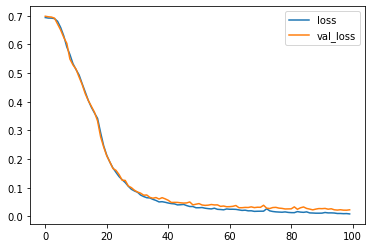

In [0]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

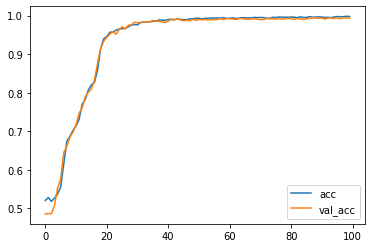

In [0]:
# plot some data
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()